In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-analysis/supply_chain_data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding.

In [4]:
df=pd.read_csv('/kaggle/input/supply-chain-analysis/supply_chain_data.csv')
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
df.shape

(100, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


# Data Cleaning And Unnderstanding 

In [9]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

**Removing Duplicates**

In [10]:
df = df.loc[:, ~df.columns.duplicated()]

**Rename col name**

In [11]:
df.rename(columns={
    'Costs': 'Transportation_costs',
    'Lead times': 'Supplier_lead_time'
}, inplace=True)

**Filling null values**

In [12]:
df = df.fillna({
    'Shipping carriers': 'Unknown',
    'Customer demographics': 'Unknown'
})

**Cahnging The DataTypes of the Data**

In [13]:
df['Price']=df['Price'].astype(float)
df['Revenue generated'] = df['Revenue generated'].astype(float)
df['Shipping costs'] = df['Shipping costs'].astype(float)


In [14]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Supplier_lead_time,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Transportation_costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


# ===============================
# 3. Descriptive Analytics
# ===============================

# --- Product Analysis ---

In [15]:
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Supplier_lead_time,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation_costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


,Number of products sold,Revenue generated
SKU,,
SKU51,154,9866.465458
SKU38,705,9692.318040
SKU31,168,9655.135103
SKU90,320,9592.633570
SKU2,8,9577.749626
SKU32,781,9571.550487
SKU67,513,9473.798033
SKU88,737,9444.742033
SKU52,820,9435.762609


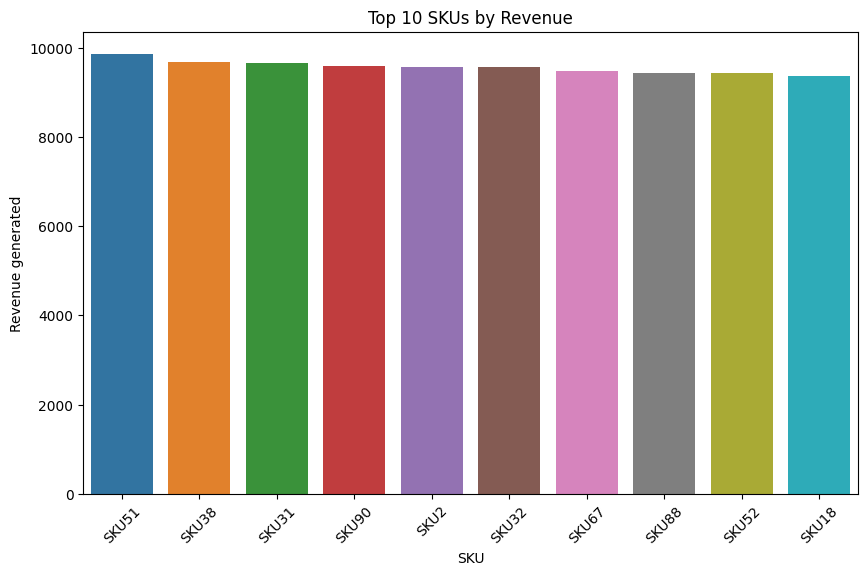

In [16]:
top_products=df.groupby('SKU').agg({
    'Number of products sold':'sum',
    'Revenue generated':'sum'
}).sort_values(by='Revenue generated',ascending=False).head(10)
display(top_products)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products['Revenue generated'])
plt.title("Top 10 SKUs by Revenue")
plt.xticks(rotation=45)
plt.show()


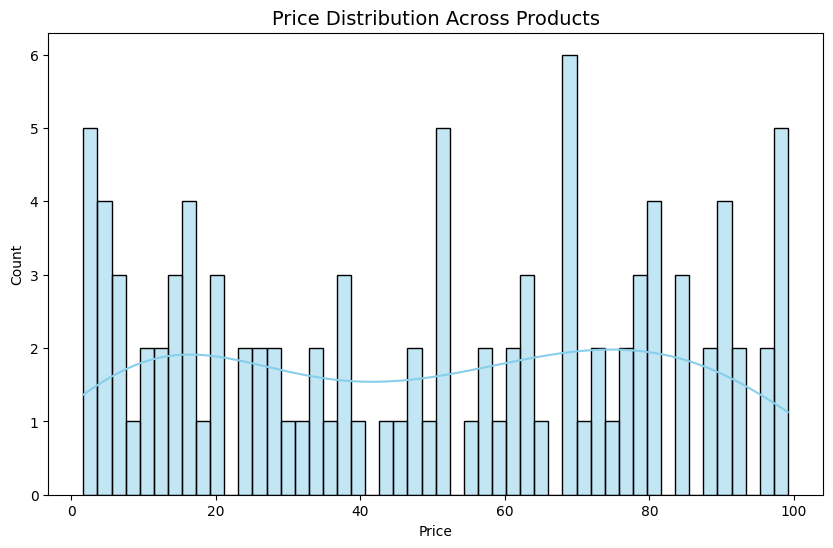

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')

plt.title("Price Distribution Across Products", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


**Finding Primium Outliers**

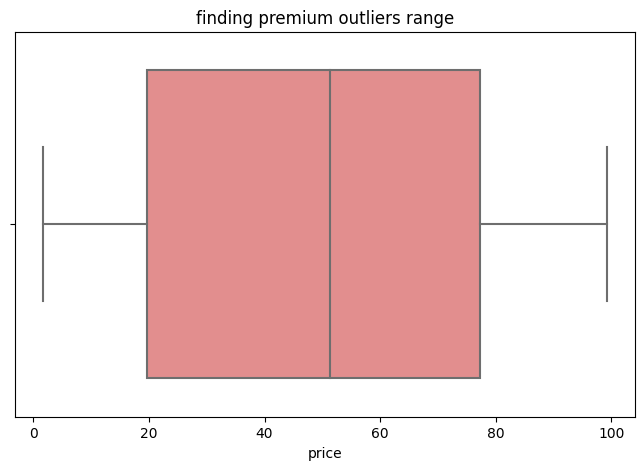

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'],color='lightcoral')
plt.title('finding premium outliers range')
plt.xlabel('price')
plt.show()

In [19]:
low=df['Price'].quantile(0.25)
high=df['Price'].quantile(0.75)

bins=[0,low , high, df['Price'].max()]
labels=['Low cost','Midium range','Premium ']

df['PriceDistribution']=pd.cut(df['Price'],
                               bins,
                                labels
                               )

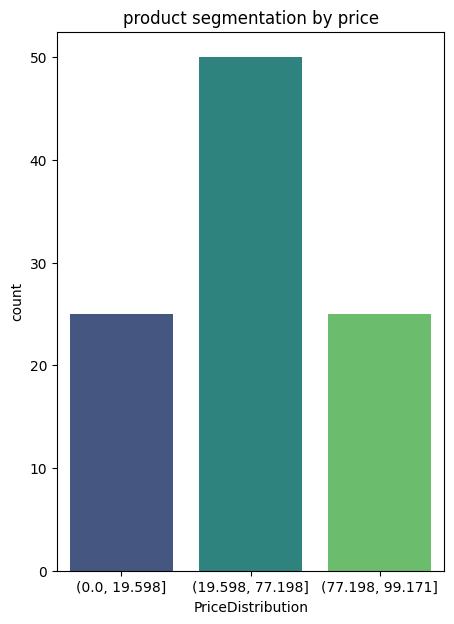

In [20]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['PriceDistribution'], palette='viridis')
plt.title('product segmentation by price')
plt.show()

# --Customer Segmentation Analysis--

# -----Demographic-wise revenue contribution.------


,Customer demographics,Revenue generated
3,Unknown,173090.133837
0,Female,161514.489122
1,Male,126634.394260
2,Non-binary,116365.801520


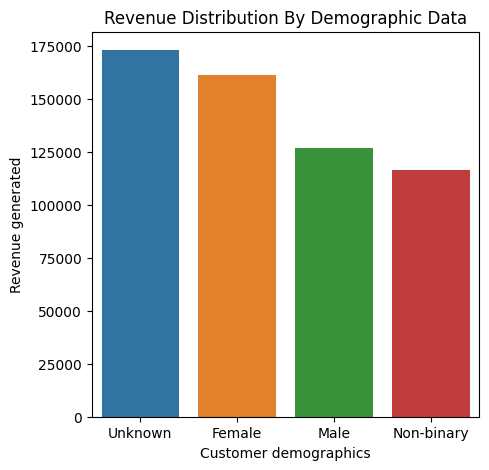

In [21]:
Demo_rev_cont=(df.groupby('Customer demographics')
               ['Revenue generated'].sum().reset_index()
               .sort_values(by='Revenue generated', ascending=False))
display(Demo_rev_cont)

plt.figure(figsize=(5,5))
sns.barplot(x=Demo_rev_cont['Customer demographics']
              ,y=Demo_rev_cont['Revenue generated'],data=Demo_rev_cont)
plt.title('Revenue Distribution By Demographic Data')
plt.show()

# -----High Value Customer Cluster-------

In [22]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Supplier_lead_time,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation_costs,PriceDistribution
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,"(19.598, 77.198]"
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,"(0.0, 19.598]"
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,"(0.0, 19.598]"
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,"(19.598, 77.198]"
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,"(0.0, 19.598]"


Customer_cluster_revenue
Medium Value Cluster    50
Low Value Cluster       25
High Value Cluster      25
Name: count, dtype: int64


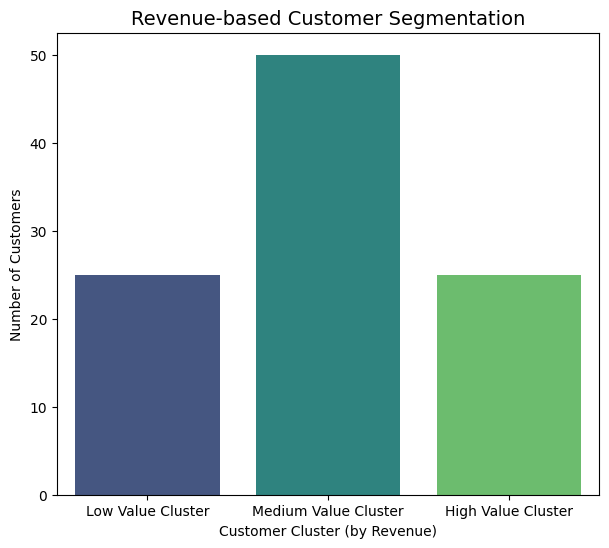

,Customer_cluster_revenue,Revenue generated
0,Low Value Cluster,53430.332661
1,Medium Value Cluster,298307.385895
2,High Value Cluster,225867.100182


In [23]:

low_revenue  = df['Revenue generated'].quantile(0.25)
high_revenue = df['Revenue generated'].quantile(0.75)


bins   = [0, low_revenue, high_revenue, df['Revenue generated'].max()]
labels = ['Low Value Cluster', 'Medium Value Cluster', 'High Value Cluster']


df['Customer_cluster_revenue'] = pd.cut(
    df['Revenue generated'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


print(df['Customer_cluster_revenue'].value_counts())


plt.figure(figsize=(7,6))
sns.countplot(x=df['Customer_cluster_revenue'], palette='viridis')
plt.title('Revenue-based Customer Segmentation', fontsize=14)
plt.xlabel("Customer Cluster (by Revenue)")
plt.ylabel("Number of Customers")
plt.show()

cal_cluster_revenue=df.groupby('Customer_cluster_revenue')['Revenue generated'].sum().reset_index()
display(cal_cluster_revenue)

# ---Supplier Analysis---

# -----Avg. lead time per supplier.-----

,Supplier name,Lead time
0,Supplier 1,14.777778
1,Supplier 2,18.545455
2,Supplier 3,20.133333
3,Supplier 4,15.222222
4,Supplier 5,18.055556


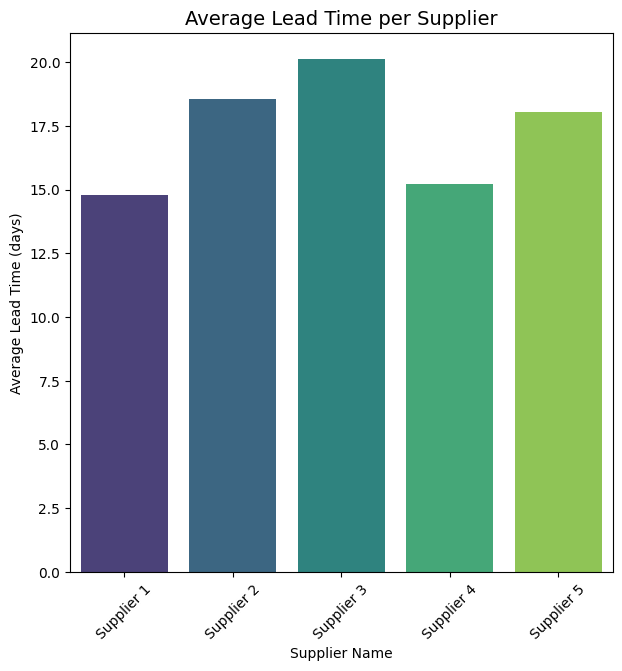

In [24]:
average_lead_time = df.groupby('Supplier name')['Lead time'].mean().reset_index()
display(average_lead_time)

plt.figure(figsize=(7,7))
sns.barplot(x='Supplier name', y='Lead time', data=average_lead_time, palette='viridis')

plt.title('Average Lead Time per Supplier', fontsize=14)
plt.xlabel('Supplier Name')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.show()


In [25]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Supplier_lead_time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes',
       'Transportation_costs', 'PriceDistribution',
       'Customer_cluster_revenue'],
      dtype='object')

# -----Cost vs defect rates trade-off.-----

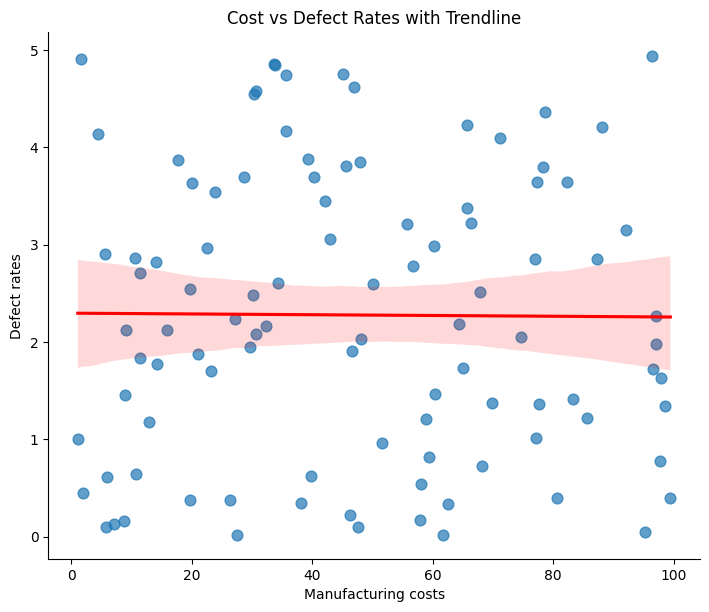

In [26]:
sns.lmplot(
    x='Manufacturing costs',
    y='Defect rates',
    data=df,
    height=6,
    aspect=1.2,
    scatter_kws={'s':60, 'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title("Cost vs Defect Rates with Trendline")
plt.show()

Defect_rate_cluster
Medium Defects    50
Low Defects       25
High Defects      25
Name: count, dtype: int64


,Defect_rate_cluster,Manufacturing costs
0,Low Defects,1079.184138
1,Medium Defects,2471.844913
2,High Defects,1175.640273


,Defect_rate_cluster,Manufacturing costs
0,Low Defects,43.167366
1,Medium Defects,49.436898
2,High Defects,47.025611


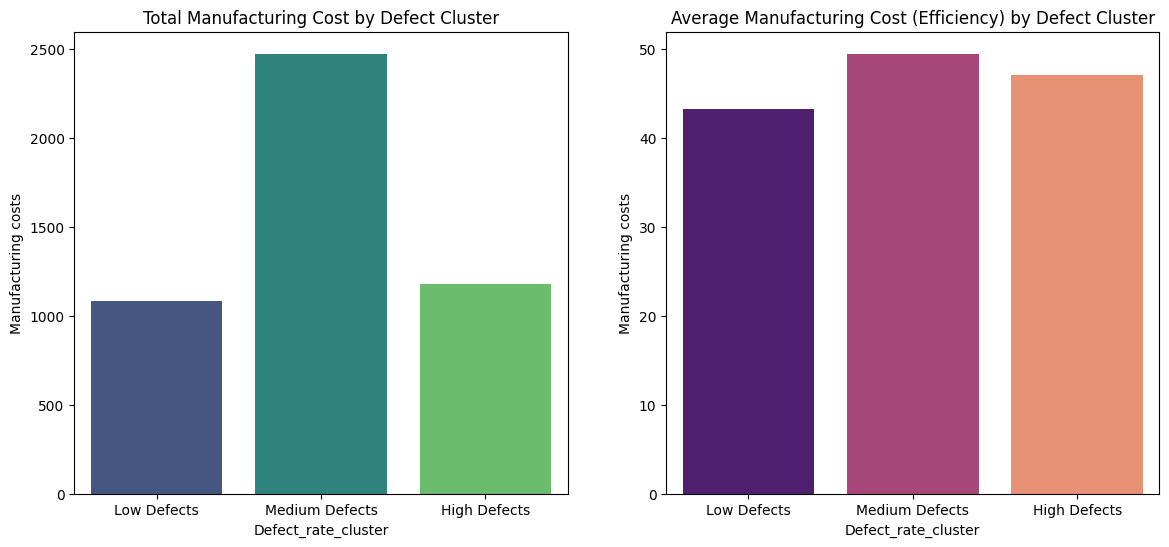

In [27]:
low=df['Defect rates'].quantile(0.25)
high=df['Defect rates'].quantile(0.75)

bins = [0, low, high, df['Defect rates'].max()] 
labels=['Low Defects', 'Medium Defects', 'High Defects']

df['Defect_rate_cluster']=pd.cut(
    df['Defect rates'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(df['Defect_rate_cluster'].value_counts())

manufacturing_cost_defect_total=df.groupby('Defect_rate_cluster')['Manufacturing costs'].sum().reset_index()
display(manufacturing_cost_defect_total)
manufacturing_cost_defect_efficency=df.groupby('Defect_rate_cluster')['Manufacturing costs'].mean().reset_index()

display(manufacturing_cost_defect_efficency)


#vissualisation
fig, axes = plt.subplots(1, 2, figsize=(14,6))


sns.barplot(x='Defect_rate_cluster', y='Manufacturing costs', data=manufacturing_cost_defect_total, ax=axes[0], palette="viridis")
axes[0].set_title("Total Manufacturing Cost by Defect Cluster")


sns.barplot(x='Defect_rate_cluster', y='Manufacturing costs', data=manufacturing_cost_defect_efficency, ax=axes[1], palette="magma")
axes[1].set_title("Average Manufacturing Cost (Efficiency) by Defect Cluster")

plt.show()


In [28]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Supplier_lead_time,Order quantities,...,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation_costs,PriceDistribution,Customer_cluster_revenue,Defect_rate_cluster
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,46.279879,Pending,0.226410,Road,Route B,187.752075,"(19.598, 77.198]",High Value Cluster,Low Defects
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,30,33.616769,Pending,4.854068,Road,Route B,503.065579,"(0.0, 19.598]",Medium Value Cluster,High Defects
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,27,30.688019,Pending,4.580593,Air,Route C,141.920282,"(0.0, 19.598]",High Value Cluster,High Defects
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,"(19.598, 77.198]",Medium Value Cluster,High Defects
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,3,92.065161,Fail,3.145580,Air,Route A,923.440632,"(0.0, 19.598]",Low Value Cluster,Medium Defects


# ---Logistics Analysis---

# -----Avg. shipping times & costs by carrier.-----

,Shipping carriers,Shipping times,Shipping costs
0,Carrier A,6.142857,5.554923
1,Carrier B,5.302326,5.509247
2,Carrier C,6.034483,5.599292


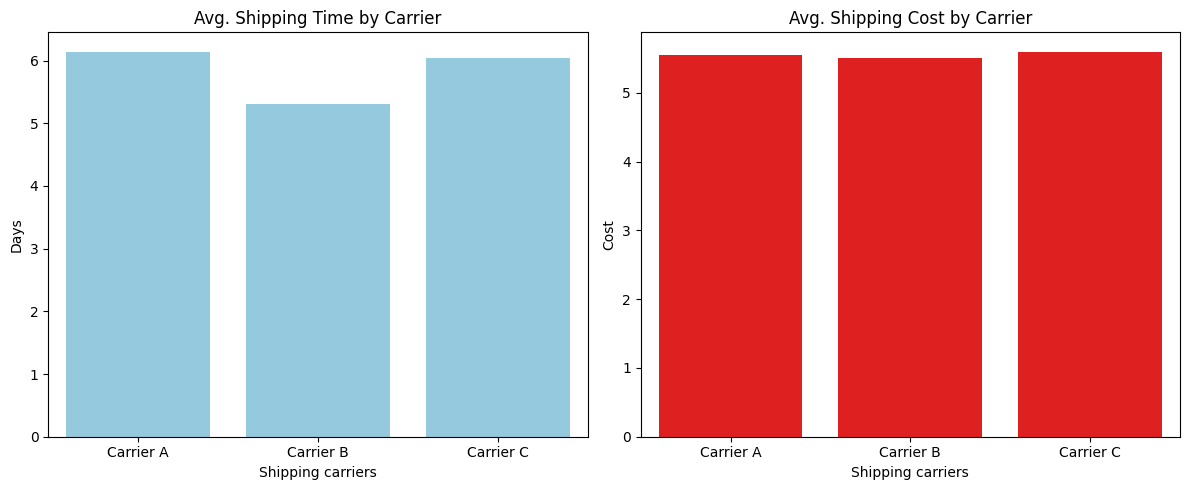

In [29]:
shipping_stats=df.groupby('Shipping carriers').agg({
    'Shipping times':'mean',
    'Shipping costs':'mean'
}).reset_index()

display(shipping_stats)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Shipping carriers', y='Shipping times', data=shipping_stats, color='skyblue')
plt.title("Avg. Shipping Time by Carrier")
plt.ylabel("Days")

plt.subplot(1,2,2)
sns.barplot(x='Shipping carriers', y='Shipping costs', data=shipping_stats, color='red')
plt.title("Avg. Shipping Cost by Carrier")
plt.ylabel("Cost")

plt.tight_layout()
plt.show()

# -----Most used transportation modes.-----

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

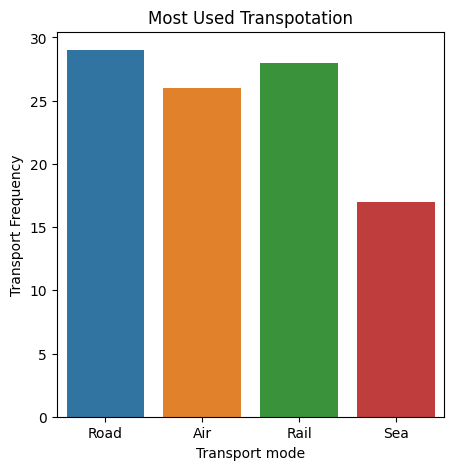

In [30]:
display(df['Transportation modes'].value_counts())

plt.figure(figsize=(5,5))
sns.countplot(x='Transportation modes',data=df)
plt.xlabel('Transport mode')
plt.ylabel('Transport Frequency')
plt.title('Most Used Transpotation')
plt.show()

# -----Route-wise cost efficiency.-----

,Routes,Transportation_costs
0,Route A,485.483128
1,Route B,595.659028
2,Route C,500.470985


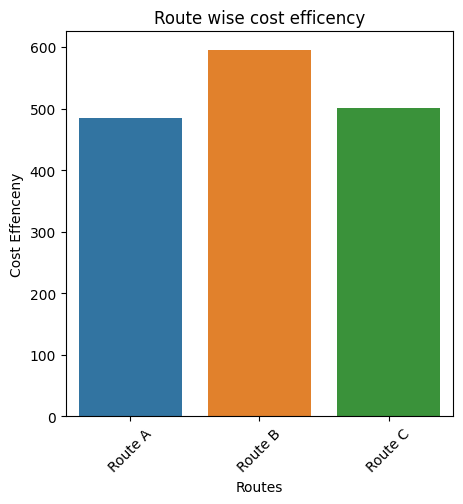

In [31]:
Route_wise_cost=df.groupby('Routes').agg({
    'Transportation_costs':'mean'
}).reset_index()
display(Route_wise_cost)

plt.figure(figsize=(5,5))
sns.barplot(x='Routes',y='Transportation_costs',data=Route_wise_cost)
plt.title("Route wise cost efficency")
plt.xlabel('Routes')
plt.ylabel('Cost Effenceny')
plt.xticks(rotation=45)
plt.show()

# 4. Diagnostic Analytics (Root Cause Analysis)

# --Inventory Bottlenecks--

# -----Correlate Stock levels with Lead times-----

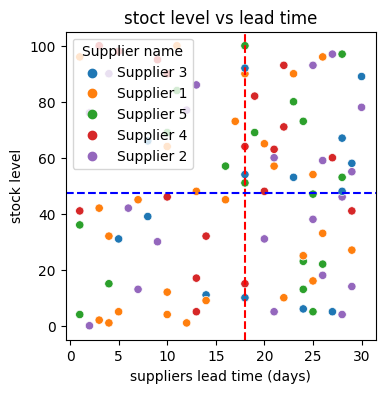

0.06787991523660455


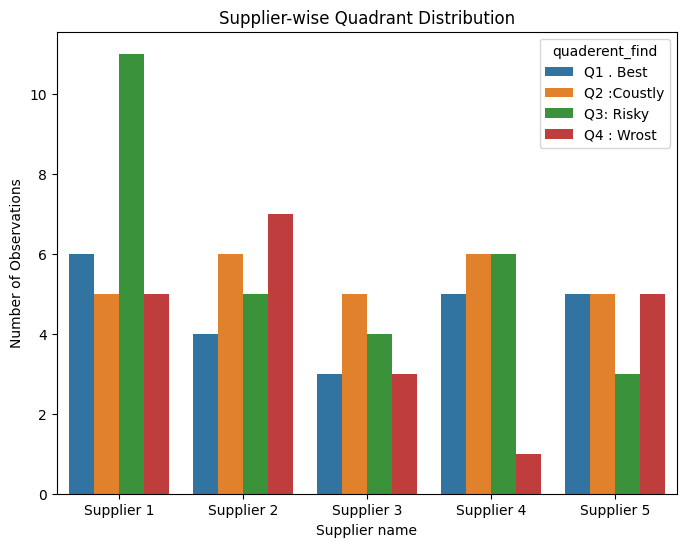

In [32]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Lead time', y='Stock levels', data =df, hue='Supplier name')
plt.xlabel('suppliers lead time (days)')
plt.ylabel('stock level')
plt.title('stoct level vs lead time')

# thresholds
plt.axvline(x=df['Lead time'].median(), color='red', linestyle='--')
plt.axhline(y=df['Stock levels'].median(), color='blue', linestyle='--')
plt.show()

correlation=df['Lead time'].corr(df['Stock levels'])
print(correlation)


#COUNTING EACH VALUE IN IN EACH QUADERANT
lead_thresehold=df['Lead time'].median()
stock_thresehold=df['Stock levels'].median()

def quaderent_find(row):
    if row['Lead time'] <= lead_thresehold and row['Stock levels'] >= stock_thresehold:
        return 'Q1 . Best'
    elif row['Lead time'] > lead_thresehold and row['Stock levels'] >= stock_thresehold:
        return 'Q2 :Coustly'
    elif row['Lead time'] <= lead_thresehold and row['Stock levels'] <= stock_thresehold:
        return 'Q3: Risky '
        
    else:
        return 'Q4 : Wrost'

df['quaderent_find']=df.apply(quaderent_find, axis=1)

quaderent_summary=df.groupby(['Supplier name','quaderent_find']).size().reset_index(name='count')


plt.figure(figsize=(8,6))
sns.barplot(
    x='Supplier name',
    y='count',
    hue='quaderent_find',
    data=quaderent_summary
)
plt.title("Supplier-wise Quadrant Distribution")
plt.ylabel("Number of Observations")
plt.show()

# --Supplier Reliability--

# -----Lead times vs Defect rates.-----

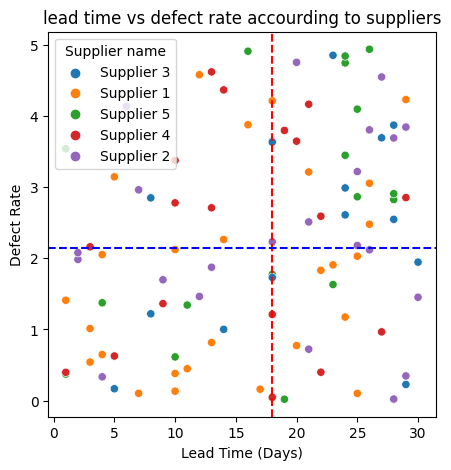

   Supplier name defect_lead_quaderent  count
0     Supplier 1           Q1 : Wrost       4
1     Supplier 1             Q2: Risky      5
2     Supplier 1              Q3: Best     12
3     Supplier 1           Q4: coustly      6
4     Supplier 2           Q1 : Wrost       8
5     Supplier 2             Q2: Risky      3
6     Supplier 2              Q3: Best      6
7     Supplier 2           Q4: coustly      5
8     Supplier 3           Q1 : Wrost       6
9     Supplier 3             Q2: Risky      3
10    Supplier 3              Q3: Best      4
11    Supplier 3           Q4: coustly      2
12    Supplier 4           Q1 : Wrost       5
13    Supplier 4             Q2: Risky      6
14    Supplier 4              Q3: Best      5
15    Supplier 4           Q4: coustly      2
16    Supplier 5           Q1 : Wrost       8
17    Supplier 5             Q2: Risky      2
18    Supplier 5              Q3: Best      6
19    Supplier 5           Q4: coustly      2


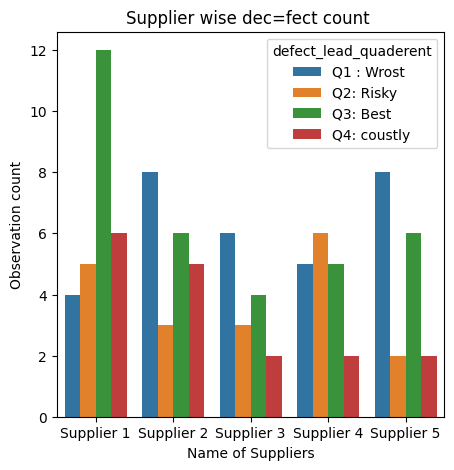

In [33]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Lead time', y='Defect rates', data=df, hue='Supplier name')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Defect Rate')
plt.title('lead time vs defect rate accourding to suppliers')
plt.axvline(x=df['Lead time'].median(), color='red', linestyle='--')
plt.axhline(y=df['Defect rates'].median(), color='blue', linestyle='--')
plt.show()

#thrasehold
lead_thresehold=df['Lead time'].median()
defect_thresehold=df['Defect rates'].median()

def quaderent_defect_lead_find(row):
    if row['Lead time']<= lead_thresehold and row['Defect rates']<= defect_thresehold:
        return 'Q3: Best'

    elif row['Lead time']<= lead_thresehold and row['Defect rates']>= defect_thresehold:
        return 'Q2: Risky'
    elif row['Lead time']> lead_thresehold and row['Defect rates']> defect_thresehold: 
        return 'Q1 : Wrost '
    else:
        return 'Q4: coustly'

df['defect_lead_quaderent']=df.apply(quaderent_defect_lead_find, axis=1)

defect_quaderent_summary=df.groupby(['Supplier name','defect_lead_quaderent']).size().reset_index(name='count')
print(defect_quaderent_summary)

plt.figure(figsize=(5,5))
sns.barplot(x='Supplier name',y='count',hue='defect_lead_quaderent', data=defect_quaderent_summary)
plt.xlabel('Name of Suppliers')
plt.ylabel('Observation count')
plt.title('Supplier wise dec=fect count ')
plt.show()

# ===== Correlation Heatmap (Optional Improvement) =====

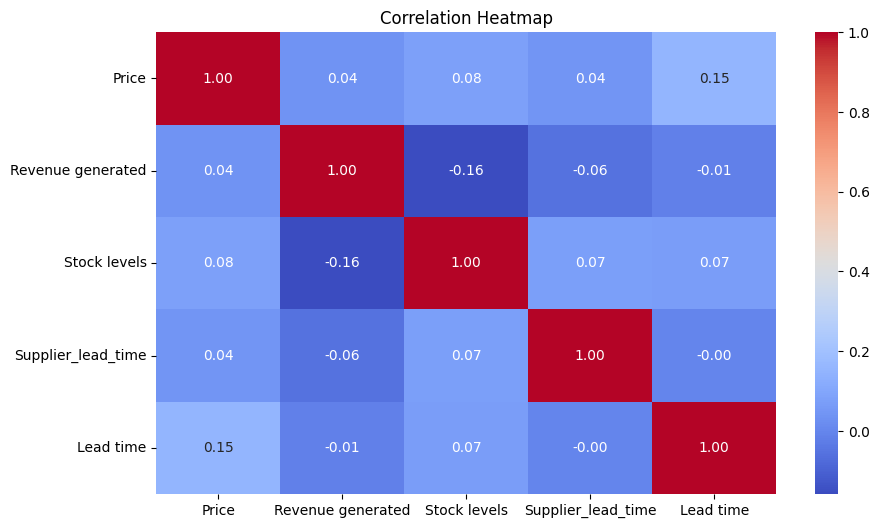

In [34]:

plt.figure(figsize=(10,6))
sns.heatmap(df[['Price','Revenue generated','Stock levels','Supplier_lead_time','Lead time']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()